In [32]:
import json
import matplotlib.pyplot as plt
import matplotlib
from collections import defaultdict


In [15]:
output_file = '../data/cadec/output.json'
gt_file = '../data/cadec/test.json'
train_file = '../data/cadec/train.json'

In [17]:
with open(output_file,'r') as fp:
    output = json.load(fp)
with open(gt_file, 'r') as fp:
    gt = json.load(fp)
with open(train_file, 'r') as fp:
    train = json.load(fp)

In [9]:
do_no_find = [] # in the groundtruth, but the model did not detect out
miss_classification = [] # not in the groundtruth, but the model detected out

error_sentence_dict = {}

output_list = []
gt_list = []

for sentence_idx in range(len(output)):
    output_sent = output[sentence_idx]
    output_entities = output_sent['entity']
    output_entity_set = []
    for entity in output_entities:
        output_entity_set.append(entity['text'])
    
    gt_sent = gt[sentence_idx]
    gt_entities = gt_sent['ner']
    gt_entity_set = []
    sentence = gt_sent['sentence']
    for entity in gt_entities:
        tokens = [sentence[i] for i in entity['index']]
        gt_entity_set.append(tokens)

    #compare
    for entity in output_entity_set:
        output_list.append(entity)
        if entity not in gt_entity_set:
            miss_classification.append(entity)
            # error_sentence_dict[entity] = sentence_idx
    
    for entity in gt_entity_set:
        gt_list.append(entity)
        if entity not in output_entity_set:
            do_no_find.append(entity)
            # error_sentence_dict[entity] = sentence_idx

all_error_cases = do_no_find + miss_classification
print("do no find:", len(do_no_find))
print("miss classification:", len(miss_classification))
print("total:", len(all_error_cases))

do no find: 282
miss classification: 236
total: 518


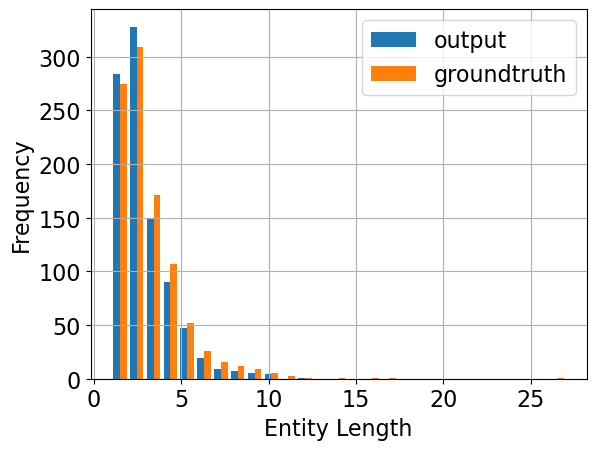

In [64]:
output_list_length = [len(entity) for entity in output_list]
gt_list_length = [len(entity) for entity in gt_list]
matplotlib.rcParams.update({'font.size': 16})
plt.hist([output_list_length, gt_list_length], bins=27, label=['output', 'groundtruth'])
plt.legend()
plt.grid()
plt.xlabel("Entity Length")
plt.ylabel("Frequency")
plt.show()

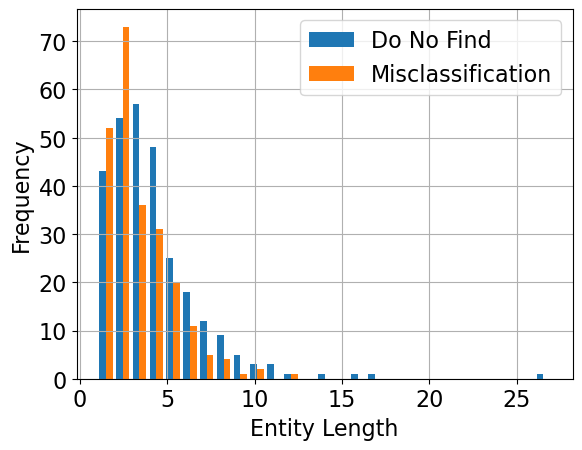

In [67]:
# length problem - extremly short or extremly long
do_no_find_length = [len(entity) for entity in do_no_find]
miss_classification_length = [len(entity) for entity in miss_classification]
matplotlib.rcParams.update({'font.size': 16})
plt.hist([do_no_find_length, miss_classification_length], bins=27, label=['Do No Find', 'Misclassification'])
plt.legend()
plt.grid()
plt.xlabel("Entity Length")
plt.ylabel("Frequency")
plt.show()

In [36]:
# type problem - nested and discontinuous



In [ ]:
# containing the words such as not and hard(否定词语)

In [38]:
do_no_find

[['could', 'not', 'sleep', 'well'],
 ['gas'],
 ['drowsy'],
 ['pain', 'neck'],
 ['muscles', 'pain'],
 ['hard', 'to', 'get', 'up', 'in', 'the', 'AM'],
 ['hard', 'to', 'stay', 'awake'],
 ['degenerative', 'back', 'disease'],
 ['unable', 'to', 'focus'],
 ['want', 'to', 'give', 'up'],
 ['not',
  'able',
  'to',
  'remember',
  'things',
  'like',
  'whether',
  'I',
  'had',
  'done',
  'something',
  'or',
  'where',
  'I',
  'had',
  'placed',
  'something'],
 ['crave', 'sweets'],
 ['crave', 'carbohydrates'],
 ['bouts', 'of', 'diverticulitis'],
 ['bleeding', 'inside'],
 ['cramp'],
 ["'", 'scared', "'", 'feeling'],
 ['charlie', 'horse', 'in', 'feet'],
 ['Severe', 'hip', '&', 'feet', 'pain'],
 ['hardly', 'walk'],
 ['tendonitis', 'in', 'elbows'],
 ['pain'],
 ['sore'],
 ['painful'],
 ['can', 'hardly', 'sleep'],
 ['tingly'],
 ['constipation'],
 ['painful'],
 ['intense', 'chills', 'and', 'shivers'],
 ['lost', '30', 'pounds'],
 ['little', 'pain'],
 ['couldn', "'", 't', 'lift', 'my', 'arms', 'or',

In [33]:
len(miss_classification)

282

In [27]:
output_entity_set

[['decreased', 'cognitive', 'skills'], ['Brain', 'fog']]

In [28]:
gt_entity_set

[['Brain', 'fog'], ['decreased', 'cognitive', 'skills']]

In [22]:
train_list = []
for sentence_idx in range(len(train)):
    train_sent = train[sentence_idx]
    train_entities = train_sent['ner']
    train_entity_set = []
    sentence = train_sent['sentence']
    for entity in train_entities:
        tokens = [sentence[i] for i in entity['index']]
        train_list.append(tokens)


In [24]:
# the error semantics(negative)
negative_words = ["unable","not","no"]

# the negative word distribution in the groundtruth(for the entity dimension)
cnt_neg = 0
for entity in train_list:
    for word in entity:
        if word in negative_words:
            cnt_neg += 1
            break
print("The total entity number: ", len(train_list), "," , cnt_neg, "of them have negative words")

cnt_neg = 0
for entity in output_list:
    for word in entity:
        if word in negative_words:
            cnt_neg += 1
            break
print("The total entity number: ", len(output_list), "," , cnt_neg, "of them have negative words")

# near the same, not the typical error

The total entity number:  4428 , 69 of them have negative words
The total entity number:  944 , 13 of them have negative words


In [29]:
gt[0]

{'sentence': ['Brain', 'fog', 'and', 'decreased', 'cognitive', 'skills', '.'],
 'ner': [{'index': [0, 1], 'type': 'ADR'},
  {'index': [3, 4, 5], 'type': 'ADR'}]}

In [57]:
# overlapped entities and discontinuous entities

# discontinuous entities
def isDiscontinuous(l):
    lastIndex = l[0]
    for idx in range(1, len(l)):
        if l[idx] != (lastIndex + 1):
            return True
        lastIndex = l[idx]

def overlapCount(ner_list):
    position_set = [0 for i in range(200)]
    overlap_cnt = 0
    for ner in ner_list:
        ner_index = ner['index']
        for idx in ner_index:
            if position_set[idx] == 0:
                position_set[idx] = 1
            else:
                overlap_cnt += 1
                break
    return overlap_cnt



discontinuous_entity_sentence = defaultdict(list)
for sentence_idx in range(len(gt)):
    sentence = gt[sentence_idx]['sentence']
    ners = gt[sentence_idx]['ner']
    for ner in ners:
        if isDiscontinuous(ner['index']):
            discontinuous_entity_sentence[sentence_idx].append(ner['index'])

In [53]:
train[3]

{'sentence': ['Muscle',
  'aches',
  'and',
  'weakness',
  'in',
  'neck',
  ',',
  'arms',
  ',',
  'shoulders',
  ',',
  'upper',
  'back',
  ',',
  'legs',
  '.'],
 'ner': [{'index': [0, 1], 'type': 'ADR'},
  {'index': [3, 4, 5], 'type': 'ADR'},
  {'index': [3, 4, 11, 12], 'type': 'ADR'},
  {'index': [3, 4, 7], 'type': 'ADR'},
  {'index': [3, 4, 9], 'type': 'ADR'},
  {'index': [3, 4, 14], 'type': 'ADR'}]}

In [66]:
# entity type distribution

def reportTypeDistribution(data):
    total_entity_cnt = 0
    overlapped_entity_cnt = 0
    discontinuous_entity_cnt = 0

    for sentence_idx in range(len(data)):
        ner_list = train[sentence_idx]['ner']
        total_entity_cnt += len(ner_list)
        discontinuous_entity_cnt_tmp = 0
        for ner in ner_list:
            # print(ner)
            if isDiscontinuous(ner['index']):
                discontinuous_entity_cnt_tmp += 1

        overlapped_entity_cnt_tmp = overlapCount(ner_list)
        overlapped_entity_cnt += overlapped_entity_cnt_tmp
        discontinuous_entity_cnt += discontinuous_entity_cnt_tmp

        if overlapped_entity_cnt_tmp != 0 and discontinuous_entity_cnt_tmp != 0:
            print(data[sentence_idx])

    print("total entity:", total_entity_cnt, "overlapped:", overlapped_entity_cnt, "discontinuous:", discontinuous_entity_cnt)

In [67]:
reportTypeDistribution(train)
reportTypeDistribution(gt)

{'sentence': ['Muscle', 'aches', 'and', 'weakness', 'in', 'neck', ',', 'arms', ',', 'shoulders', ',', 'upper', 'back', ',', 'legs', '.'], 'ner': [{'index': [0, 1], 'type': 'ADR'}, {'index': [3, 4, 5], 'type': 'ADR'}, {'index': [3, 4, 11, 12], 'type': 'ADR'}, {'index': [3, 4, 7], 'type': 'ADR'}, {'index': [3, 4, 9], 'type': 'ADR'}, {'index': [3, 4, 14], 'type': 'ADR'}]}
{'sentence': ['Muscle', 'and', 'joint', 'pain', 'developed', 'after', 'approx', '12', 'months', '.'], 'ner': [{'index': [0, 3], 'type': 'ADR'}, {'index': [2, 3], 'type': 'ADR'}]}
{'sentence': ['aches', 'and', 'pain', 'in', 'both', 'arms', 'and', 'shoulders', 'and', 'weakness', 'in', 'arms', ',', 'especially', 'left', 'arm', '.'], 'ner': [{'index': [0, 1, 2, 3, 4, 5], 'type': 'ADR'}, {'index': [0, 1, 2, 3, 4, 7], 'type': 'ADR'}, {'index': [9, 10, 11], 'type': 'ADR'}]}
{'sentence': ['Pain', 'in', 'hip', ',', 'lower', 'back', ',', 'knees', '&', 'elbow', '.'], 'ner': [{'index': [0, 1, 2], 'type': 'ADR'}, {'index': [0, 1, 9],

In [62]:
# now report on the model performance


total entity: 930 overlapped: 97 discontinuous: 123
